In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [13]:
# Load the Airbnb data
df = pd.read_csv("/content/AB_NYC_2019.csv")

# Preview the data
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [14]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Data types and non-null counts
df.info()


Rows, Columns: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_

In [15]:
# Count missing values per column
df.isnull().sum()


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [16]:
# Summary of numeric columns
df.describe()
# Summary of numeric columns
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
# Count of unique values in object columns
df.select_dtypes(include='object').nunique()


,0
name,47896
host_name,11452
neighbourhood_group,5
neighbourhood,221
room_type,3
last_review,1764


In [18]:
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)


In [19]:
df.isnull().sum()


,0
host_id,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,10052


In [22]:
# Remove listings with price = 0 and price > 1000
df = df[(df['price'] > 0) & (df['price'] <= 1000)]


In [23]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 48645 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48645 non-null  int64  
 1   neighbourhood_group             48645 non-null  object 
 2   neighbourhood                   48645 non-null  object 
 3   latitude                        48645 non-null  float64
 4   longitude                       48645 non-null  float64
 5   room_type                       48645 non-null  object 
 6   price                           48645 non-null  int64  
 7   minimum_nights                  48645 non-null  int64  
 8   number_of_reviews               48645 non-null  int64  
 9   reviews_per_month               38726 non-null  float64
 10  calculated_host_listings_count  48645 non-null  int64  
 11  availability_365                48645 non-null  int64  
dtypes: float64(3), int64(6), object(3)
me

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.864500e+04,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,38726.000000,48645.000000,48645.000000
mean,6.761441e+07,40.728938,-73.952052,141.311789,6.973461,23.354836,1.374915,7.162545,112.442944
std,7.860040e+07,0.054570,0.046167,116.731330,20.267263,44.631191,1.681628,33.026643,131.434828
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.825587e+06,40.690020,-73.982980,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.081216e+07,40.722970,-73.955600,105.000000,3.000000,5.000000,0.720000,1.000000,44.000000
75%,1.074344e+08,40.763130,-73.936130,175.000000,5.000000,24.000000,2.020000,2.000000,226.000000
max,2.743213e+08,40.913060,-73.712990,1000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 48645 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48645 non-null  int64  
 1   neighbourhood_group             48645 non-null  object 
 2   neighbourhood                   48645 non-null  object 
 3   latitude                        48645 non-null  float64
 4   longitude                       48645 non-null  float64
 5   room_type                       48645 non-null  object 
 6   price                           48645 non-null  int64  
 7   minimum_nights                  48645 non-null  int64  
 8   number_of_reviews               48645 non-null  int64  
 9   reviews_per_month               38726 non-null  float64
 10  calculated_host_listings_count  48645 non-null  int64  
 11  availability_365                48645 non-null  int64  
dtypes: float64(3), int64(6), object(3)
me

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.864500e+04,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,38726.000000,48645.000000,48645.000000
mean,6.761441e+07,40.728938,-73.952052,141.311789,6.973461,23.354836,1.374915,7.162545,112.442944
std,7.860040e+07,0.054570,0.046167,116.731330,20.267263,44.631191,1.681628,33.026643,131.434828
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.825587e+06,40.690020,-73.982980,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.081216e+07,40.722970,-73.955600,105.000000,3.000000,5.000000,0.720000,1.000000,44.000000
75%,1.074344e+08,40.763130,-73.936130,175.000000,5.000000,24.000000,2.020000,2.000000,226.000000
max,2.743213e+08,40.913060,-73.712990,1000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<ipython-input-25-2054005264>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='Set2')


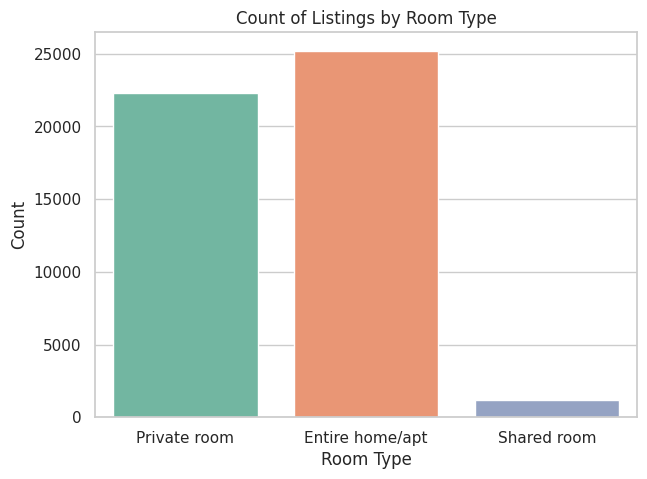

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='room_type', palette='Set2')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


<ipython-input-26-2393648345>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='room_type', y='price', palette='Set1')


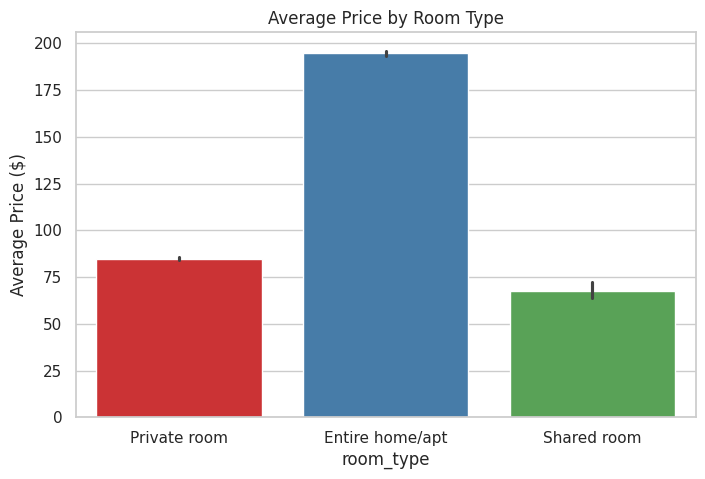

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='room_type', y='price', palette='Set1')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.show()


<ipython-input-27-3932613255>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='cool')


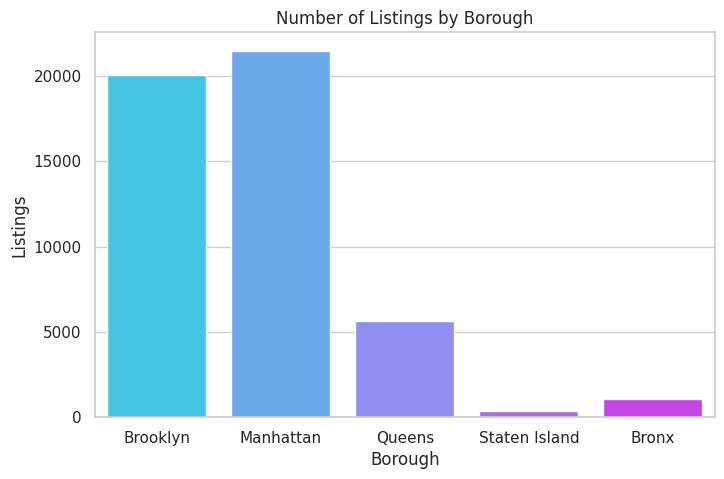

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', palette='cool')
plt.title('Number of Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Listings')
plt.show()
